## Classification with CNN
##### with Tensorflow package

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

### 2. Load and prepare the CIFAR10 dataset:

The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images.

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
print(train_images.shape)
print(test_images.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


### 3. Create the convolutional base:

The 6 lines of code below define the convolutional base using a common pattern: a stack of Conv2D and MaxPooling2D layers.

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


### 4. Add Dense layers on top:
To complete our model, you will feed the last output tensor from the convolutional base (of shape (4, 4, 64)) into one or more Dense layers to perform classification.

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

### 5. Compile and train the model:

After introducing dropout into the network, we compile the model and train it on the CIFAR10 images.

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 [==============================] - 68s 43ms/step - loss: 1.4903 - accuracy: 0.4592 - val_loss: 1.2571 - val_accuracy: 0.5575
Epoch 2/10
1563/1563 [==============================] - 62s 40ms/step - loss: 1.1241 - accuracy: 0.6028 - val_loss: 1.0495 - val_accuracy: 0.6310
Epoch 3/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.9773 - accuracy: 0.6598 - val_loss: 1.0084 - val_accuracy: 0.6460
Epoch 4/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8787 - accuracy: 0.6934 - val_loss: 0.9158 - val_accuracy: 0.6818
Epoch 5/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.8062 - accuracy: 0.7196 - val_loss: 0.8893 - val_accuracy: 0.6875
Epoch 6/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.7450 - accuracy: 0.7415 - val_loss: 0.8790 - val_accuracy: 0.6937
Epoch 7/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.6976 - accuracy: 0.7540 - val_loss: 0.8464 -

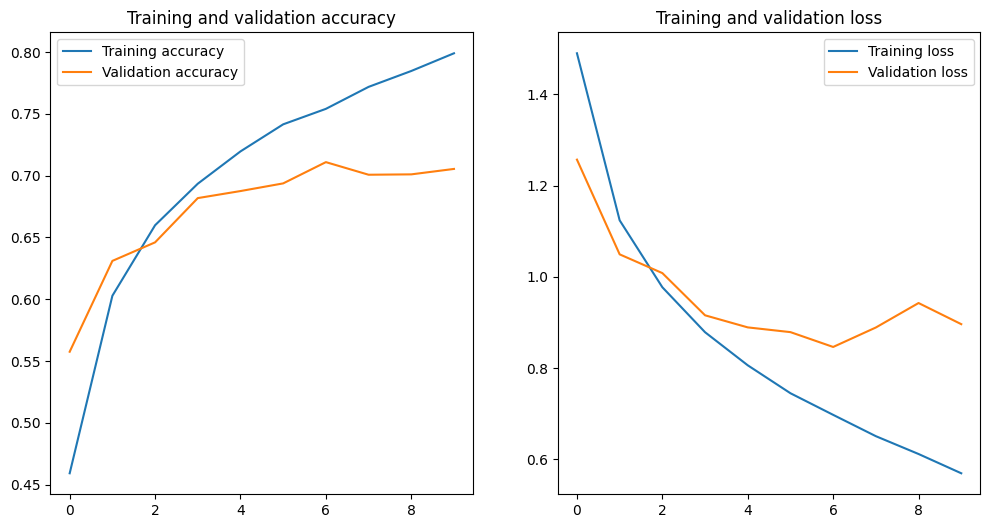

In [ ]:
# Import matplotlib
import matplotlib.pyplot as plt

# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

# Plot training and validation loss per epoch
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


313/313 [==============================] - 5s 16ms/step


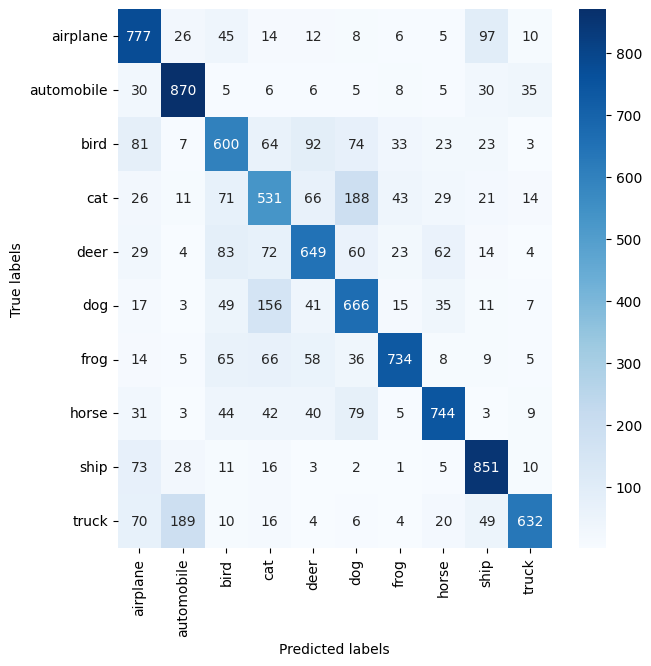

In [ ]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

# Use the model to predict the test dataset
test_predictions = model.predict(test_images)
test_predictions = np.argmax(test_predictions, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(test_labels, test_predictions)

# Define your labels
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
          'horse', 'ship', 'truck']

# Plot the confusion matrix using seaborn
plt.figure(figsize=(7, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels,
            yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

